<a href="https://colab.research.google.com/github/2004Likhitha/AIML/blob/main/AIML_III_Module_4_Lab_1_Perceptron_and_Gradient_Descent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Students Internship Batch of 2024**
# Module 4: Perceptron and Gradient Descent
## Lab 1: Perceptron

In this lab, we will be studying the perceptron learning algorithm.

In [1]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

First we need to define a labeled data set. Let's make a toy dataset.

In [2]:
X = np.array([
    [-2, 4],
    [4, 1],
    [1, 6],
    [2, 4],
    [6, 2]
])

Next we need to add a bias term -1 into the data set.

In [3]:
X = np.array([
    [-2, 4, -1],
    [4, 1, -1],
    [1, 6, -1],
    [2, 4, -1],
    [6, 2, -1],
])

In [4]:
y = np.array([-1, -1, 1, 1, 1])

This small toy data set contains two samples labeled with −1 and three samples labeled with +1. This means we have a binary classification problem, as the data set contains two sample classes. Lets plot the dataset to see, that is is linearly seperable

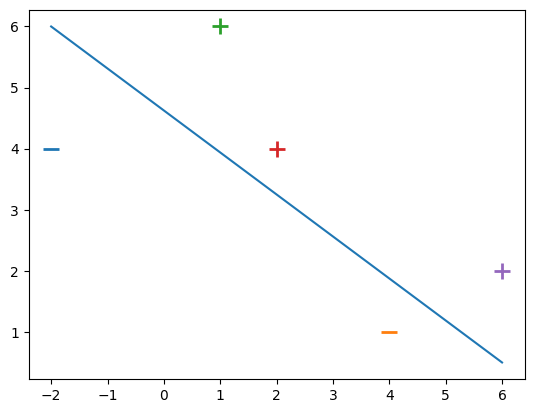

In [5]:
for d, sample in enumerate(X):
    # Plot the negative samples
    if d < 2:
        plt.scatter(sample[0], sample[1], s=120, marker='_', linewidths=2)
    # Plot the positive samples
    else:
        plt.scatter(sample[0], sample[1], s=120, marker='+', linewidths=2)

# Print a possible hyperplane, that is seperating the two classes.
plt.plot([-2, 6], [6, 0.5])

Finally we can code our Perceptron algorithm using our update rule. To keep it simple, we will linearly loop over the sample set. For larger data sets it makes sence, to randomly pick a sample during each iteration in the for-loop.

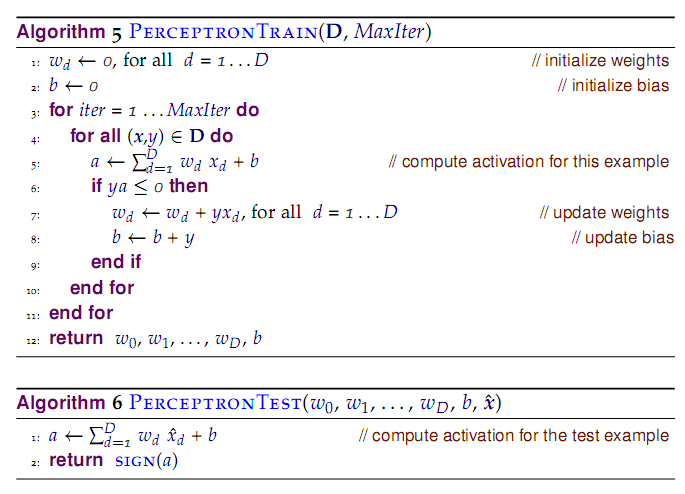

The algorithm is shown in the above image.

In [6]:
def perceptron_algo(X, Y):
    w = np.zeros(len(X[0]))
    eta = 1
    epochs = 10

    for epoch in range(epochs):
        for i, x in enumerate(X):
            if (np.dot(X[i], w) * Y[i]) <= 0:
                w = w + eta * X[i] * Y[i]
    return w

In [7]:
def perceptron_algo_plot(X, Y):
    '''
    train perceptron and plot the total loss in each epoch.

    :param X: data samples
    :param Y: data labels
    :return: weight vector as a numpy array
    '''
    w = np.zeros(len(X[0]))
    eta = 1
    n = 30
    errors = []

    for t in range(n):
        total_error = 0
        for i, x in enumerate(X):
            if (np.dot(X[i], w) * Y[i]) <= 0:
                total_error += (np.dot(X[i], w) * Y[i])
                w = w + eta * X[i] * Y[i]
        errors.append(total_error * -1)

    plt.plot(errors)
    plt.xlabel('Epoch')
    plt.ylabel('Total Loss')

    return w

Next, we will see the the training error at each epoch.

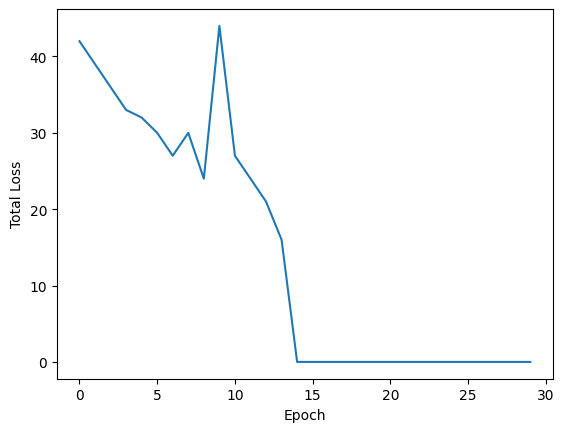

In [8]:
w = perceptron_algo_plot(X, y)

We now plot the decision boundary and check which samples have been classified as positive and which samples have been classified as negative.

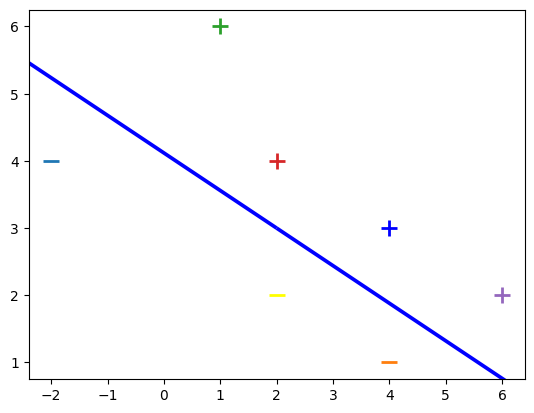

In [9]:
for d, sample in enumerate(X):
    # Plot the negative samples
    if d < 2:
        plt.scatter(sample[0], sample[1], s=120, marker='_', linewidths=2)
    # Plot the positive samples
    else:
        plt.scatter(sample[0], sample[1], s=120, marker='+', linewidths=2)

# Add our test samples

plt.scatter(2, 2, s=120, marker='_', linewidths=2, color='yellow')
plt.scatter(4, 3, s=120, marker='+', linewidths=2, color='blue')

# Print the hyperplane calculated by perceptron_sgd()
x2 = [w[0], w[1], -w[1], w[0]]
x3 = [w[0], w[1], w[1], -w[0]]

x2x3 = np.array([x2, x3])
X, Y, U, V = zip(*x2x3)
ax = plt.gca()
ax.quiver(X, Y, U, V, scale=1, color='blue')

As you can see, our algorithm has correctly classified all the samples. The decision boundary is shown in blue.

# Things to try


1.   Try this on a real dataset like the Sonar dataset or the Banknote Dataset and show the error plot.
2.   Increase/decrease the learning rate to see how many iterations will be take to coverge. Does it even converge on a huge learning rate?
4. Take a toy dataset that is not linearly separable and run the perceptron algorithm on it. What happens? Note your observations. An example is given below.



# Answer for the first question

In [17]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [18]:
from google.colab import files
uploaded = files.upload()

Saving BankNote_Authentication.csv to BankNote_Authentication.csv


In [19]:
df = pd.read_csv('BankNote_Authentication.csv')

In [20]:
X = df.drop('class', axis=1)  # Replace 'target_column' with the actual name
y = df['class']

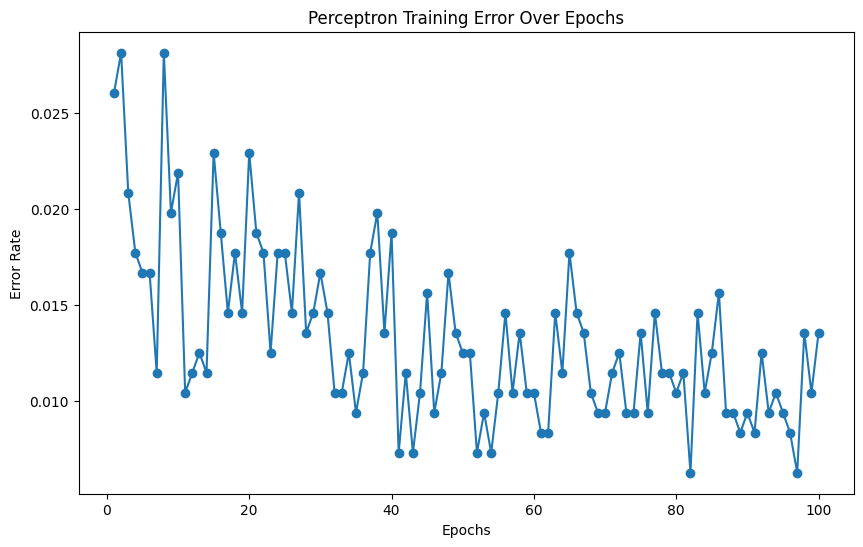

In [21]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize the Perceptron model
model = Perceptron(max_iter=1000, tol=1e-3, random_state=42)

# Train the model and track the error rate
errors = []
for _ in range(100):  # Train for 100 epochs
    model.partial_fit(X_train, y_train, classes=np.unique(y))
    y_pred = model.predict(X_train)
    error = 1 - accuracy_score(y_train, y_pred)
    errors.append(error)

# Plot the error rate
plt.figure(figsize=(10, 6))
plt.plot(range(1, 101), errors, marker='o')
plt.title('Perceptron Training Error Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Error Rate')
plt.show()

# Answer for the second question

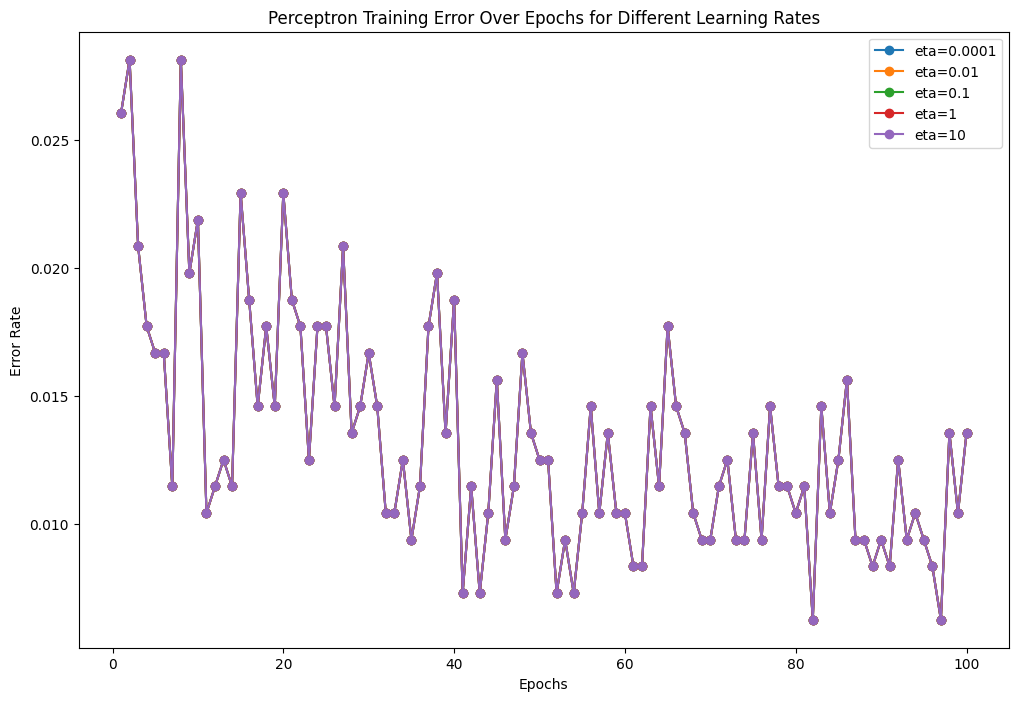

In [22]:
# Define learning rates to test
learning_rates = [0.0001, 0.01, 0.1, 1, 10]  # Small, moderate, and large learning rates

# Plotting setup
plt.figure(figsize=(12, 8))

for eta in learning_rates:
    model = Perceptron(max_iter=1000, tol=1e-3, random_state=42, eta0=eta)

    errors = []
    for _ in range(100):  # Train for 100 epochs
        model.partial_fit(X_train, y_train, classes=np.unique(y))
        y_pred = model.predict(X_train)
        error = 1 - accuracy_score(y_train, y_pred)
        errors.append(error)

    # Plot the error rate for the current learning rate
    plt.plot(range(1, 101), errors, marker='o', label=f'eta={eta}')

# Finalize the plot
plt.title('Perceptron Training Error Over Epochs for Different Learning Rates')
plt.xlabel('Epochs')
plt.ylabel('Error Rate')
plt.legend()
plt.show()

Observation:

Small Learning Rate: Likely results in slow convergence, requiring more epochs.

Moderate Learning Rate: Should converge within a reasonable number of epochs.

Large Learning Rate: May cause the model to oscillate and not converge.

# Answer for the third question

Accuracy: 82.50%


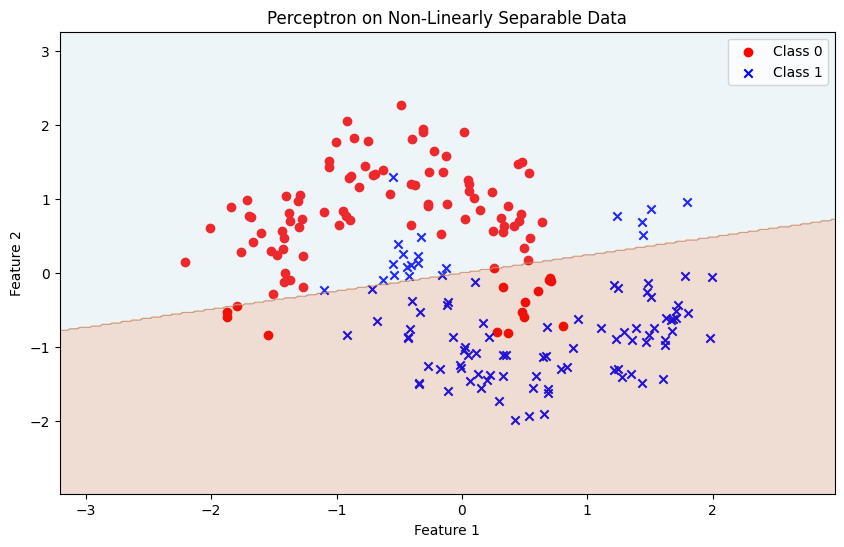

In [23]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.linear_model import Perceptron
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# Create a non-linearly separable dataset
X, y = make_moons(n_samples=200, noise=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Initialize the Perceptron model
model = Perceptron(max_iter=1000, tol=1e-3, random_state=42)

# Train the model
model.fit(X, y)

# Predict on the training set
y_pred = model.predict(X)

# Calculate accuracy
accuracy = accuracy_score(y, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

# Plot the data and decision boundary
plt.figure(figsize=(10, 6))

# Plot the original points
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='red', marker='o', label='Class 0')
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='blue', marker='x', label='Class 1')

# Plot the decision boundary
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.2, cmap=plt.cm.Paired)

plt.title('Perceptron on Non-Linearly Separable Data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()


In [10]:
X = np.array([
    [-2, 4, -1],
    [4, 1, -1],
    [1, 6, -1],
    [2, 4, -1],
    [6, 2, -1],
])

In [11]:
y = np.array([-1, -1, 1, -1, -1])

[-2.  3. 15.]


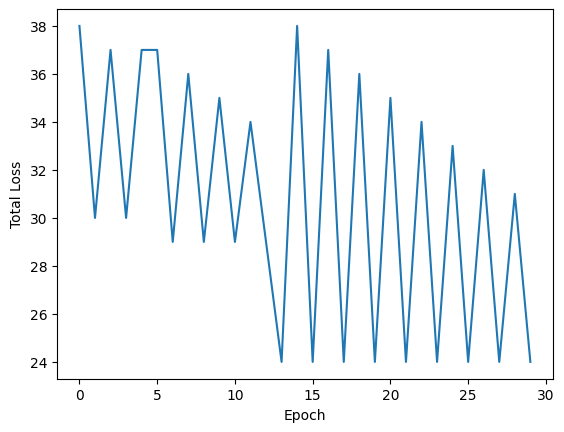

In [13]:
print(perceptron_algo_plot(X, y))

If the training data is not Linearly Separable, the perceptron algorithm will eventually repeat the same set of weights and thereby enter an infinite loop.

## **Additional Critical Thinking Questions**

1. Consider the following dataset where x = (x1, x2) ∈ {0, 1}× {0, 1}, y ∈ {−, +}. Note that this dataset is corresponding to the boolean function “AND” over the 2-bit binary input.

  Suppose we are training a Perceptron to learn on this dataset and we initialize w0 = 0 and b0 = 0.

  Please i) answer if this dataset is learnable by Perceptron, and ii) if so, write down the weights update procedure for each iteration; if not, explain why.

i) Yes, this dataset is learnable by a Perceptron. The reason is that the AND function is linearly separable. The output is y=1 only when both x1=1 and x2=1. Otherwise, y=-1. Since these points can be separated by a linear boundary (a line), the Perceptron algorithm can learn this function.

ii)

• Initialization:

Weights: w = [w1,w2] = [0,0]

Bias: b = 0

• Training Examples:

(x1,y1) = ([0,0],-)

(x2,y2) = ([0,1],-)

(x3,y3) = ([1,0],-)

(x4,y4) = ([1,1],+)

• Iteration-1:

-	Input: x1=[0,0], y1=-

-	Prediction: output=w1×0+w2×0+b=0

-	The prediction matches the desired output, no update is needed.

-	Input: x2=[0,1], y2=-

-	Prediction: output=w1×0+w2×1+b=0

-	The prediction matches the desired output, no update is needed.

-	Input: x3=[1,0], y3=-

-	Prediction: output=w1×1+w2×0+b=0

-	The prediction matches the desired output, no update is needed.

-	Input: x4=[1,1], y4=+

-	Prediction: output=w1×1+w2×1+b=0

-	The prediction does not match the desired output +1, so update is required:

   o	w1=w1+1×1=0+1=1

   o	w2=w2+1×1=0+1=1

   o	b=b+1=0+1=1

Updated weights: w=[1,1], bias b=1

• Iteration-2:

-	Input: x1=[0,0], y1=-

-	Prediction: output=w1×0+w2×0+b=1

-	The prediction +1 does not match the desired output -1, so update is required:

   o	w1=w1+(−1)×0=1+0=1

   o	w2=w2+(−1)×0=1+0=1
   
   o	b=b+(−1)=1−1=0

-	Input: x2=[0,1], y2=-

-	Prediction: output=w1×0+w2×1+b=1

-	The prediction +1 does not match the desired output -1, so update is required:

   o	w1=w1+(−1)×0=1+0=1

   o	w2=w2+(−1)×1=1−1=0
   
   o	b=b+(−1)=0−1=−1

-	Input: x3=[1,0], y3=-

-	Prediction: output=w1×1+w2×0+b=1−1=0

-	The prediction 0 matches the desired output -1, no update is needed.

-	Input: x4=[1,1], y4=+

-	Prediction: output=w1×1+w2×1+b = 1×1+0×1−1 = 0

-	The prediction 0 does not match the desired output +1, so update is required:
   o	w1=w1+1×1=1+1=2

   o	w2=w2+1×1=0+1=1
   
   o	b=b+1=−1+1=0

Updated weights: w=[2,1], bias b=0

• Subsequent Iterations: After continuing this process, the Perceptron will eventually converge (if not already) with weights that correctly classify all the inputs for the "AND" function, confirming that the data is indeed learnable by a Perceptron.


2. Extending AND to any boolean functions over a 2-bit binary input, where we have (2^2)^2 = 16 possible distinct boolean functions in total, among which how many of them can be learnable by a Perceptron?

Ans : Among the 16 possible Boolean functions over a 2-bit binary input, 10 of them are linearly separable and thus can be learned by a Perceptron. The remaining 6 functions, including XOR and XNOR, are not linearly separable and cannot be learned by a single-layer Perceptron.

  Please also write down the truth table(s) of the boolean functions that are not learnable, if there are any.

  Ans : The Boolean functions over a 2-bit binary input that are not learnable by a Perceptron are those that are not linearly separable. Specifically, these include the XOR function, the XNOR function, and their complement variations. Below are the truth tables for these non-learnable Boolean functions:

  1. XOR Function (y = x1 XOR x2)

x1 | x2 | y=x1 XOR x2

0	 |  0	 |  0

0	 |  1	 |  1

1	 |  0	 |  1

1	 |  1	 |  0

Similarly the remaining 5 truth tables also
